# Python Programming

## 1. Introduction to Python

::::{hint} Prerequisites

:::{dropdown} **Scalar variables**: integers (`int`), floating point numbers (`float`), strings (`str`), *etc.*

```python
42  # int
1.0  # float
'these'
"are"
"""all
valid strings."""
```
:::

:::{dropdown} **Collections**: `list`, `tuple`, `dict`, `set`, *etc.*

```python
>>> # Lists: are mutable ordered-sequences
>>> my_things = [1, 2, 'banana']
>>> my_things.append(3.14)
>>> my_things
[1, 2, 'banana', 3.14]
```
```python
>>> # Tuples: are immutable ordered-sequences
>>> truthy_values = ('yes', 'ja', True, 1.0)
>>> del truthy_values[0]
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: 'tuple' object doesn't support item deletion
```
```python
>>> # Dictionaries: key-value pairs or hash-maps
>>> game_status = {"jill": 99, "t-rex": "RIP"}
```
```python
>>> # Sets: unique unordered sequences
>>> fruits = {"apple", "banana", "banana"}
>>> fruits
{'apple', 'banana'}
```
:::

:::{dropdown} **Control structures**: `if-elif-else`, `for` loop, `while` loop, *etc.*

```python

# Conditional expressions
if 0.5 > schrödingers_cat > 1.0:
    print("Alive")
elif 0. > schrödingers_cat >= 0.5:
    print("Dead")
else:
    print("Undead")

# Loops
for i_day in range(365):
    print("Hi, good morning!")

while True:
    print("Na", end="")
    if input() == "stop":
        break
print("Batman!")
```

:::

:::{dropdown} **Functions**: built-in functions (`len`, `type`, ...) and user-defined functions.

```python
>>> greeting = "hello world"
>>> len(greeting)
11
>>> type(greeting)
<class 'str'>
```
:::

:::{dropdown} **Decorators**: special syntax which modifies the behaviour of a function or a class.
:class: dropdown

```python
@something
def foo():
    ...
```

```{seealso}

- `functools.lru_cache` for an example of a decorator,
- `functools.wraps` and `contextlib.contextmanager` to create your own decorators.
```

:::

::::


Python also uses and encourages us to structure code using
- Type annotations: hints which can be used by a type-checker or a compiler.
- Class: simple encapsulation, inheritance, *etc.*
- Modules: a `.py` file containing a valid Python code. Typically does not execute anything on import.
- Package: an installable, re-usable collection of modules and other files, distributable via PyPI or conda-forge

**but this is not necessary for the purpose of this webinar.**

## 2. Numpy, Pandas, Matplotlib

In [6]:
# Code for display_timings()

import matplotlib.pyplot as plt


def display_timings(**kwargs):
    nrows = len(kwargs)
    fig, ax = plt.subplots(figsize=(8, min(nrows, 8)))
    keys = list(kwargs)
    fmt_keys = [k.replace("_", " ") for k in kwargs]
    i_keys = list(range(len(keys)))

    ax.barh(i_keys, times := [kwargs[key].average for key in keys])
    ax.errorbar(times, i_keys, xerr=[kwargs[key].stdev for key in keys], fmt="ro")
    ax.set(xscale="log", xlabel="avg. wall time (seconds)")
    axis = plt.gca()
    axis.set_yticks(i_keys, fmt_keys)

### 2.1 Numpy

:::{important}`NumPy` is a Python library for arrays
It can be used to perform a wide variety of (efficient) mathematical operations and linear algebra on arrays and matrices.
:::

In [2]:
a = list(range(10000))
b = [0] * 10000

Why should use **loops**...

In [3]:
%%timeit -q -o
for i in range(len(a)):
    b[i] = a[i] ** 2

<TimeitResult : 2.11 ms ± 24.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [4]:
time_loops = _

In [5]:
import numpy as np

a = np.arange(10000)

... when you can **vectorize**!

In [6]:
%%timeit -q -o
b = a**2

<TimeitResult : 2.72 μs ± 17.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)>

In [7]:
time_vec = _

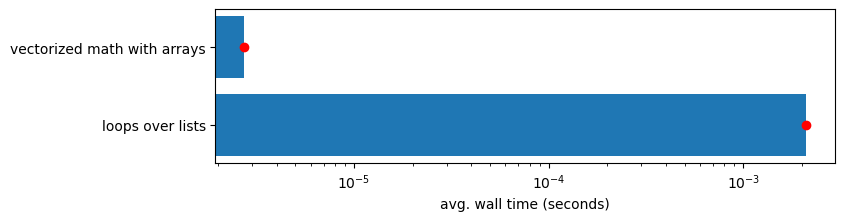

In [8]:
display_timings(loops_over_lists=time_loops, vectorized_math_with_arrays=time_vec)

:::{note}
Numpy is often imported as `np` and this is common convention.
:::

#### Creating arrays

Python sequences such as lists or tuples can be **transformed** into a Numpy array.

Numpy arrays can be **1D, 2D, .... n-dimensional**.

In [9]:
a = np.array([1, 2, 3])  # 1-dimensional array (rank 1)
b = np.array([[1, 2, 3], [4, 5, 6]])  # 2-dimensional array (rank 2)

print(b.shape)  # the shape (rows,columns)
print(b.size)  # number of elements

(2, 3)
6


It is often **homogenous**, that is made of a single data type

In [10]:
a.dtype

dtype('int64')

Arrays can also be **generated**.

In [11]:
np.eye(3)  # Identity "matrix"

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
a = np.arange(16)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [13]:
a = a.reshape(4, 4)

b = np.random.rand(16).reshape(4, 4)
b

array([[0.48393543, 0.84738729, 0.9970519 , 0.96338808],
       [0.04859883, 0.85952064, 0.4993356 , 0.83991888],
       [0.31325352, 0.22319914, 0.33228195, 0.61012378],
       [0.73402512, 0.19036682, 0.79140184, 0.50256134]])

#### Array maths and vectorization

In [14]:
c = np.add(a, b)  # equivalent to `a + b`
c

array([[ 0.48393543,  1.84738729,  2.9970519 ,  3.96338808],
       [ 4.04859883,  5.85952064,  6.4993356 ,  7.83991888],
       [ 8.31325352,  9.22319914, 10.33228195, 11.61012378],
       [12.73402512, 13.19036682, 14.79140184, 15.50256134]])

Other common mathematical operations include:
- elementwise operations:
    - `-` (numpy.subtract)
    - `*` (numpy.multiply)
    - `/` (numpy.divide)
    - `**` (numpy.pow())
- `.T` (numpy.transpose())
- `np.sqrt()`, `np.sum()`, `np.mean()`, `np.std()`, `np.max()`, `np.min()`
- `@` (np.dot() / np.matmul())

In [15]:
# Matrix multiplication
a * b

array([[ 0.        ,  0.84738729,  1.99410381,  2.89016425],
       [ 0.19439533,  4.29760318,  2.99601363,  5.87943213],
       [ 2.50602814,  2.00879228,  3.32281947,  6.71136158],
       [ 8.80830139,  2.47476861, 11.07962575,  7.53842013]])

In [16]:
np.dot(a, b)  # equals to `a @ b`

array([[ 2.87718121,  1.87701937,  3.53810502,  3.56785046],
       [ 9.1964328 , 10.3589149 , 14.01839019, 15.23181878],
       [15.51568438, 18.84081043, 24.49867537, 26.89578711],
       [21.83493596, 27.32270596, 34.97896054, 38.55975543]])

In [17]:
np.matmul(a, b)

array([[ 2.87718121,  1.87701937,  3.53810502,  3.56785046],
       [ 9.1964328 , 10.3589149 , 14.01839019, 15.23181878],
       [15.51568438, 18.84081043, 24.49867537, 26.89578711],
       [21.83493596, 27.32270596, 34.97896054, 38.55975543]])

### 2.2 Pandas

:::{important}`Pandas` is for tabular data

It is provides intuitive data structures for functions for reading in, manipulating and
performing high-performance data analysis of tabular data.
:::

#### Code example to analyze the Titanic passenger data

In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col="Name")

In [19]:
titanic.shape

(891, 11)

Tabular data can be **heterogenous**.

In [20]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
# print the first 5 lines of the dataframe

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# print summary statistics for each column

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic[["Age", "Sex", "Survived", "Pclass"]].groupby(["Survived", "Sex"]).aggregate(
    "median"
)

Age  Pclass
Survived Sex                 
0        female  24.5     3.0
         male    29.0     3.0
1        female  28.0     2.0
         male    28.0     2.0

### 2.3 Matplotlib

`Matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.

#### Visualization of the Titanic passenger data

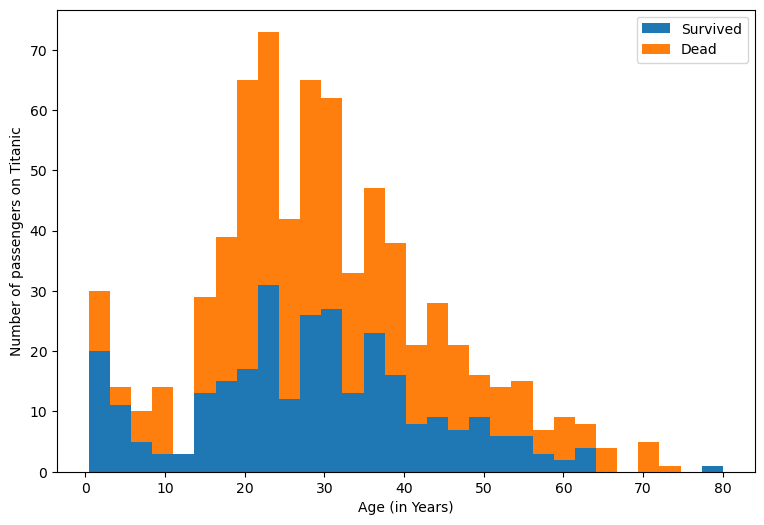

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.hist(
    [
        titanic[titanic["Survived"] == 1]["Age"],
        titanic[titanic["Survived"] == 0]["Age"],
    ],
    stacked=True,
    bins=30,
    label=["Survived", "Dead"],
)
plt.xlabel("Age (in Years)")
plt.ylabel("Number of passengers on Titanic")
plt.legend()

# GPU Programming using Python

There are several options available to work with python for GPU programming.
- [GPU Programming: When, Why and How?](https://enccs.github.io/gpu-programming/)
- [GPU Programming (Carpentries)](https://arc.leeds.ac.uk/lesson-gpu-programming/)

## 1. **`cuDF`** and **`cuML`** libraries in ![RAPIDS](img/RAPIDS-logo.png)

:::{important} [RAPIDS](https://rapids.ai/) is a high-level package collection

It implements CUDA functionalities and API with Python bindings.

**It only supports NVIDIA GPUs.**

- **`cuDF`** is the dataframe library for manipulating tabular datasets using GPU. cuDF provides a **Pandas**-like API for loading, joining, aggregating, filtering, and manipulating data.
- **`cuML`** is a suite of libraries that implement algorithms and mathematical primitives functions to train machine learning models on your data to make predictions, similar to the **`scikit-learn`** API.

:::

### 1.1 Timing the Titanic

In [25]:
%timeit titanic[["Age", "Sex", "Survived", "Pclass"]].groupby(["Survived", "Sex"]).aggregate("mean")

1.01 ms ± 22.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
import cudf

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic_gpu = cudf.read_csv(url, index_col="Name")

In [27]:
%timeit titanic_gpu[["Age", "Sex", "Survived", "Pclass"]].groupby(["Survived", "Sex"]).aggregate("mean")

1.95 ms ± 22.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


:::{hint} GPU version was slower. Why?

1. The size of the data needs to be justifiably big for a GPU to be more performant than a CPU. The data is only {eval}`titanic.memory_usage().sum() / 1024` KB big.
2. Aggregation cannot be efficiently parallized
:::

### 1.2 Timing the Taxis

Lets try to analyze NYC taxi data from <https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page> to compute median trip duration.

Dictionary of the data: <https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf>

In [28]:
import pandas as pd

trips = pd.read_parquet("./yellow_tripdata_2024-07.parquet")
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.20,1.0,N,140,79,1,15.6,3.50,0.5,3.50,0.00,1.0,24.10,2.5,0.00
1,2,2024-06-30 23:48:58,2024-07-01 00:28:04,1.0,19.48,2.0,N,132,113,2,70.0,0.00,0.5,0.00,0.00,1.0,75.75,2.5,1.75
2,2,2024-07-01 00:23:18,2024-07-01 00:29:51,1.0,1.18,1.0,N,237,145,1,8.6,1.00,0.5,2.72,0.00,1.0,16.32,2.5,0.00
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.10,1.0,N,138,164,1,36.6,10.25,0.5,12.05,0.00,1.0,60.40,2.5,1.75
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.70,2.0,N,132,263,1,70.0,1.75,0.5,10.00,6.94,1.0,90.19,0.0,1.75


In [29]:
trips.shape

(3076903, 19)

In [30]:
time_duration = %timeit -o (trips.tpep_dropoff_datetime - trips.tpep_pickup_datetime).mean()

31.8 ms ± 482 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
import cudf

trips_gpu = cudf.read_parquet("./yellow_tripdata_2024-07.parquet")

In [32]:
time_duration_gpu = %timeit -o (trips_gpu.tpep_dropoff_datetime - trips_gpu.tpep_pickup_datetime).mean()

1.88 ms ± 4.73 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**How about an aggregate operation as before?**

In [33]:
time_agg = %timeit -o trips[["passenger_count", "trip_distance", "RatecodeID", "total_amount"]].groupby(["RatecodeID"]).aggregate("mean")

67.8 ms ± 621 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
time_agg_gpu = %timeit -o trips_gpu[["passenger_count", "trip_distance", "RatecodeID", "total_amount"]].groupby(["RatecodeID"]).aggregate("mean")

14.6 ms ± 75.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


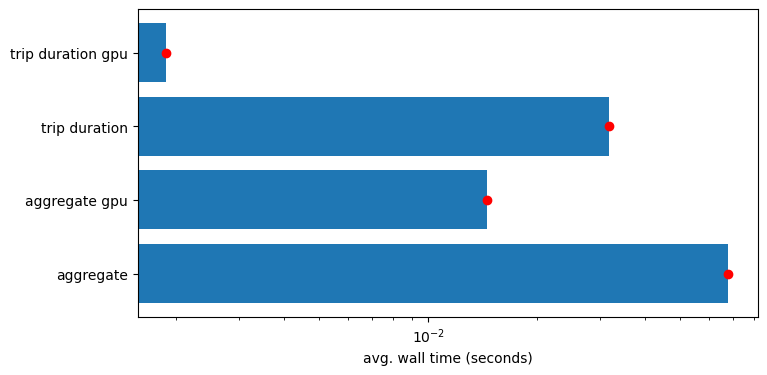

In [35]:
display_timings(
    aggregate=time_agg,
    aggregate_gpu=time_agg_gpu,
    trip_duration=time_duration,
    trip_duration_gpu=time_duration_gpu,
)

:::{hint} Now, the GPU version was faster. Why?

1. The data for NYC Yellow taxis is {eval}`trips.memory_usage().sum() / 1024**2` **MB** big which is a moderately big dataset.
2. Even for the aggregate method, we see a modest performance gain.
:::

In [36]:
del titanic, titanic_gpu, trips, trips_gpu

In [37]:
import gc
gc.collect()

8553

## 2. Numba

:::{important} `Numba` is an open-source just-in-time (JIT) compiler

- It translates a subset of Python and NumPy into fast machine code using LLVM.
- `Numba` offers options for parallelising Python code for CPUs and GPUs, with minor code changes.
:::

### 2.1 `numba.jit()` decorator

Numba provides several utilities for code generation, and its central feature is the `numba.jit()` decorator.

In [38]:
import numpy as np

mx = np.arange(10000).reshape(100, 100)


def go_slow(a):  # Function is compiled and runs in machine code
    result = 0.0
    for i in range(a.shape[0]):
        result += np.sin(a[i, i])
    return result


time_slow = %timeit -o go_slow(mx)

75.9 μs ± 1.54 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [39]:
from numba import jit


@jit(nopython=True)
def go_fast(a):
    result = 0.0
    for i in range(a.shape[0]):
        result += np.sin(a[i, i])
    return result


time_fast = %timeit -o go_fast(mx)

2.02 μs ± 37.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


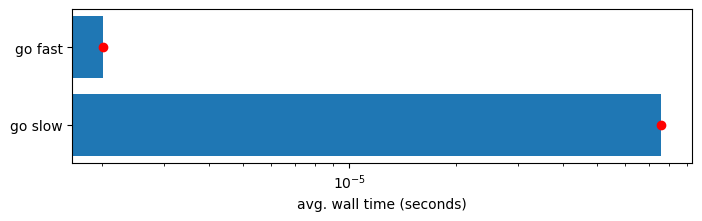

In [40]:
display_timings(go_slow=time_slow, go_fast=time_fast)

### 2.2 `ufunc` and `gufunc`

Another feature of Numba is to generate NumPy universal functions.

There are two types of universal functions:
- Those which operate on scalars are “universal functions” (`ufunc`), which are achieved via `@vectorize` decorator
- Those which operate on higher dimensional arrays and scalars are “generalized universal functions” (`gufunc`), which are achived via `@guvectorize` decorator

In [41]:
import math
import numpy as np
import numba


# a simple version without using numba
def func_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@np.vectorize(otypes=[float])
def func_numpy_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


# def func_numpy(x, y):
#     return np.pow(x, 3.0) + 4 * np.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cpu")
def func_numba_cpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)


@numba.vectorize([numba.float64(numba.float64, numba.float64)], target="cuda")
def func_numba_gpu(x, y):
    return math.pow(x, 3.0) + 4 * math.sin(y)

:::{note}
The commented-out variant `func_numpy` which uses numpy functions (`np.pow` and `np.sin`) would automatically vectorize and perform little better than the first two -  making it a better formulation for the purpose. 
**We don't do that here to illustrate vectorized functions which may be required for custom algorithms**.
:::

In [42]:
N = 10000000
mx = np.random.rand(N)
result = np.empty_like(mx)

In [43]:
%%timeit -r 1 -q -o
for i in range(N):
    result[i] = func_cpu(mx[i], mx[i])

<TimeitResult : 3.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [44]:
time_cpu = _

In [45]:
%timeit -q -o result_numpy_cpu = func_numpy_cpu(mx, mx)

<TimeitResult : 2.42 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [46]:
time_numpy_cpu = _

In [47]:
%timeit -q -o result_numba_cpu = func_numba_cpu(mx, mx)

<TimeitResult : 180 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [48]:
time_numba_cpu = _

In [49]:
%timeit -q -o result = func_numba_gpu(mx, mx)

<TimeitResult : 73.9 ms ± 709 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [50]:
time_numba_gpu = _

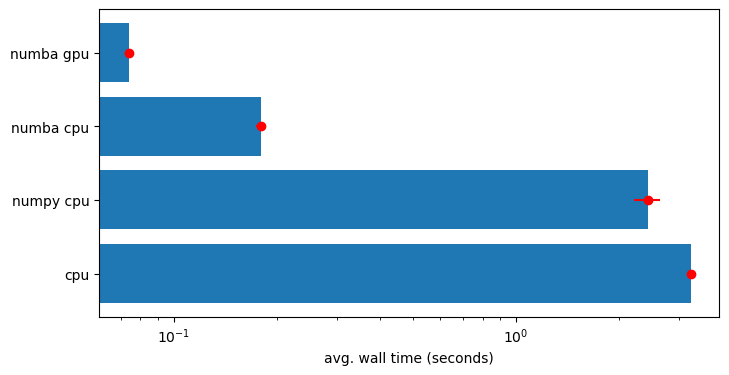

In [51]:
display_timings(
    cpu=time_cpu,
    numpy_cpu=time_numpy_cpu,
    numba_cpu=time_numba_cpu,
    numba_gpu=time_numba_gpu,
)

:::{note}
- Using `ufunc` (or `gufunc`) for GPU programming may not always yield optimal performance due to automatic handling of data transfer and kernel launching.
- In practical applications, not every function can be constructed as a `ufunc`.
:::

### 2.3 An example for vector addition with manual data transfer

Sometimes, for better performance, one need to calibrate kernels and manually manage data transfer.

In [52]:
import numpy as np
import numba


@numba.cuda.jit
def func(a, b, c):
    """GPU vectorized addition. Computes C = A + B"""
    # like threadIdx.x + (blockIdx.x * blockDim.x)
    thread_id = numba.cuda.grid(ndim=1)
    size = len(c)

    if thread_id < size:
        c[thread_id] = a[thread_id] + b[thread_id]

Below, we explicitly move two arrays to the device memory.

In [53]:
N = 10000000
a = numba.cuda.to_device(np.random.random(N))
b = numba.cuda.to_device(np.random.random(N))
c = numba.cuda.device_array_like(a)

In [54]:
type(a)

numba.cuda.cudadrv.devicearray.DeviceNDArray

In [55]:
%timeit -r 1 func.forall(len(a))(a, b, c)
print(c.copy_to_host())

2.64 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
[1.84777608 0.87310076 0.31258745 ... 0.48141289 1.17548754 1.56743642]


In [56]:
nthreads = 256  # Enough threads per block for several warps per block
nblocks = (len(a) // nthreads) + 1  # Enough blocks to cover entire vector

%timeit -r 1 func[nblocks, nthreads](a, b, c)
print(c.copy_to_host())

2.63 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
[1.84777608 0.87310076 0.31258745 ... 0.48141289 1.17548754 1.56743642]


In [57]:
del a, b, c
gc.collect()

15399

## 3. Jax

:::{important} `Jax` offers a drop-in import alias for Numpy and JIT compiler

Although `Jax` was originally designed to build neural networks with built-in support for auto-differentiation, it
can also be used to optimize other generic computation loads.

- Like, CuPy (coming soon), using `import jax.numpy as jnp` provides access to a large subset of optimized Numpy functions.
- Like Numba, we decorate with `@jax.jit` to JIT compile. Compiled function can run in GPU (CUDA and experimental ROCm support), TPU or CPU opportunistically.
- Unlike Numba, Jax can only work with certain kinds of code: [pure functions, for-loops written differently, etc.](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html).


:::

### 3.1 Jax as NumPy

In [58]:
import numpy as np

data = np.random.random((10, 10_000))
data[5, 42] = np.nan
data[7, 1111] = np.nan

In [59]:
# compute 90th percentile ignoring NaNs, and along the rows of an array
time_numpy = %timeit -o np.nanpercentile(data, 90, axis=0)

291 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
import jax.numpy as jnp

time_jax = %timeit -o -r 1 jnp.nanpercentile(data, 90, axis=0)

181 μs ± 5.31 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


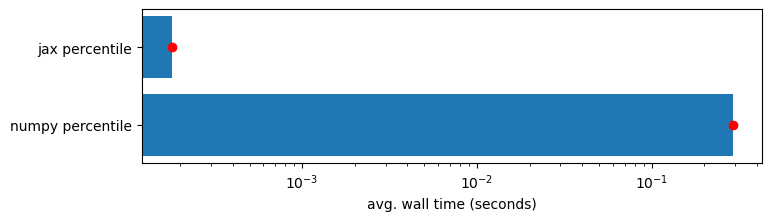

In [61]:
display_timings(numpy_percentile=time_numpy, jax_percentile=time_jax)

### 3.2 Jax as JIT compiler

Here we will revisit the example function shown in [section 2.2](#id-2-2-ufunc-and-gufunc).

In [62]:
import numpy as np
import jax.numpy as jnp
from jax import jit


def func_numpy(x, y):
    return np.power(x, 3.0) + 4 * np.sin(y)


@jit
def func_jax(x, y):
    return jnp.power(x, 3.0) + 4 * jnp.sin(y)

In [63]:
N = 10000000
mx = np.random.rand(N)

In [64]:
time_numpy = %timeit -o func_numpy(mx, mx)

207 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
time_jax = %timeit -o func_jax(mx, mx)

24.9 ms ± 338 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
import jax

jax.devices()

[cuda(id=0)]

In [67]:
dmx = jax.device_put(mx)

time_jax_gpu = %timeit -o -n 50 func_jax(dmx, dmx)

838 μs ± 141 μs per loop (mean ± std. dev. of 7 runs, 50 loops each)


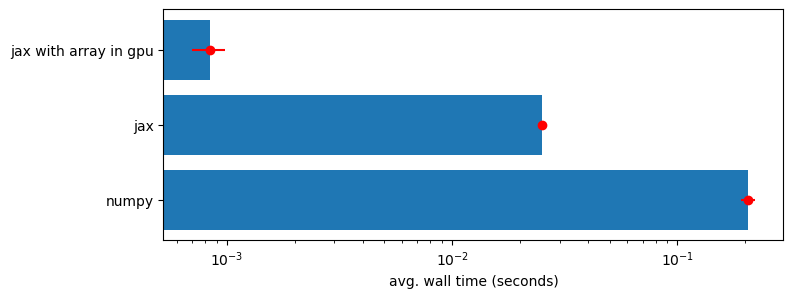

In [68]:
display_timings(numpy=time_numpy, jax=time_jax, jax_with_array_in_gpu=time_jax_gpu)

In [69]:
del mx, dmx
gc.collect()

17648

## 4. CuPy

:::{important} `CuPy` is a NumPy/SciPy-compatible array library for GPU-accelerated computing with Python. 
- It has been developed for NVIDIA GPUs but has experimental support both NVIDIA and AMD GPUs.
- All you need to do is replace `numpy` and `scipy` with `cupy` and `cupyx.scipy` in your Python code.
:::

:::{seealso}
Tutorials:
- https://docs.cupy.dev/en/stable/user_guide/basic.html
- https://arc.leeds.ac.uk/lesson-gpu-programming/02-cupy/index.html
- https://carpentries-incubator.github.io/lesson-gpu-programming/cupy.html
:::

**Replacement of numpy with cupy**

In [7]:
import cupy as cp
import numpy as np

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# creating arrays
lst_cpu = np.array(lst)
lst_gpu = cp.array(lst)

In [8]:
# calculate the Euclidean norm
lst_cpu_norm = np.linalg.norm(lst_cpu)
lst_gpu_norm = cp.linalg.norm(lst_gpu)

print("Using Numpy: ", lst_cpu_norm)
print("Using Cupy:  ", lst_gpu_norm)

Using Numpy:  16.881943016134134
Using Cupy:   16.881943016134134


Same answer, same decimal precision.

**Speed comparison between cupy and numpy**

In [9]:
# NumPy and CPU Runtime
x_cpu = np.random.random((3000, 1000))
time_numpy = %timeit -o -r 1 np.linalg.norm(x_cpu)

917 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)


In [10]:
# CuPy and GPU Runtime
x_gpu = cp.random.random((3000, 1000))
time_cupy = %timeit -o -r 1 -n 10 cp.linalg.norm(x_gpu)

122 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


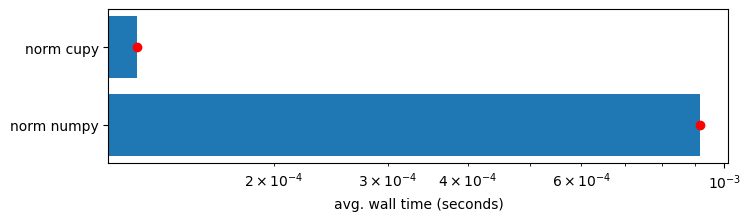

In [11]:
display_timings(norm_numpy=time_numpy, norm_cupy=time_cupy)

**Interfacing with user-defined Kernels**

In [12]:
import cupy as cp

x1 = cp.arange(25, dtype=cp.float32).reshape(5, 5)
x2 = cp.arange(25, dtype=cp.float32).reshape(5, 5)

x2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)

In [13]:
y = cp.zeros((5, 5), dtype=cp.float32)
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

**Simpler approach**: we use `ElementwiseKernel`

In [14]:
add_elemwise = cp.ElementwiseKernel(
    "float32 x1, float32 x2", "float32 y", "y = x1 + x2", "my_add_elemwise"
)

In [15]:
add_elemwise(x1, x2)

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

**Complicated approach**: we use `RawKernel` which is essentially CUDA / C++ code

In [16]:
add_kernel = cp.RawKernel(
    r"""
extern "C" __global__
void my_add(const float* x1, const float* x2, float* y) {
    int tid = blockDim.x * blockIdx.x + threadIdx.x;
    y[tid] = x1[tid] + x2[tid];
}
""",
    "my_add",
)

In [17]:
add_kernel((5,), (5,), (x1, x2, y))  # grid, block and arguments

y

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.],
       [40., 42., 44., 46., 48.]], dtype=float32)

## 5. PyCUDA

:::{important} [PyCUDA](https://pypi.org/project/pycuda/) is a Python programming environment for CUDA
- It allows users to access to NVIDIA’s CUDA parallel computing API from Python.
- PyCUDA is powerful library but only runs on NVIDIA GPUs.
- Knowledge of CUDA programming is needed.
:::

In [80]:
# Step 1: Initialization

import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

In [81]:
# Step 2: Transferring data

# 2.1: Generating numbers with single precision
import numpy as np

mx_cpu = np.random.randn(4, 4)
mx_cpu = mx_cpu.astype(np.float32)
print(mx_cpu, end="\n")

# 2.2: Allocation of memory on GPU
mx_gpu = cuda.mem_alloc(mx_cpu.nbytes)

# 2.3: Transferring data from CPU (host) to GPU (device)
cuda.memcpy_htod(mx_gpu, mx_cpu)

[[ 0.30697703  0.38735956  0.61498296 -1.9524285 ]
 [-0.6650422   0.47665367 -0.62378603 -1.3605052 ]
 [-1.0162882   1.8609197  -0.10131096  1.0034049 ]
 [-0.79997283  0.7107024   0.7616016  -0.5101648 ]]


In [82]:
# Step 3: Executing a kernel on GPU

# 3.1 Definition of the kernel
mod = SourceModule(
    """
  __global__ void doublify(float *a)
  {
    int idx = threadIdx.x + threadIdx.y*4;
    a[idx] *= 2.0;
  }
  """
)

# 3.2 Compile this kernel, loading it onto GPU, and then call this kernel
doublify = mod.get_function("doublify")

doublify(mx_gpu, block=(4, 4, 1), grid=(1, 1))

In [83]:
# Step 4: Transferring data from GPU (device) to CPU (host)

mx_doubled = np.empty_like(mx_cpu)
cuda.memcpy_dtoh(mx_doubled, mx_gpu)

print(mx_cpu, "\n\n", mx_doubled)

[[ 0.30697703  0.38735956  0.61498296 -1.9524285 ]
 [-0.6650422   0.47665367 -0.62378603 -1.3605052 ]
 [-1.0162882   1.8609197  -0.10131096  1.0034049 ]
 [-0.79997283  0.7107024   0.7616016  -0.5101648 ]] 

 [[ 0.61395407  0.7747191   1.2299659  -3.904857  ]
 [-1.3300844   0.95330733 -1.2475721  -2.7210104 ]
 [-2.0325763   3.7218394  -0.20262192  2.0068097 ]
 [-1.5999457   1.4214048   1.5232033  -1.0203296 ]]


In [84]:
# Bonus: Abstracting Away the Complications
# Using a pycuda.gpuarray to achieve the same effect with less writing

import pycuda.gpuarray as gpuarray

mx_gpu = gpuarray.to_gpu(np.random.randn(4, 4).astype(np.float32))
mx_doubled = (2 * mx_gpu).get()

print(mx_gpu, "\n\n", mx_doubled)

[[-0.17868416  0.8772735  -0.23984867  0.35474667]
 [ 1.7033818  -1.4176269  -0.43798986  1.9720881 ]
 [-0.84189016  1.5366915   1.2805576  -1.3255235 ]
 [-0.0714388   1.4255133  -0.51113176  1.149445  ]] 

 [[-0.35736832  1.754547   -0.47969735  0.70949334]
 [ 3.4067636  -2.8352537  -0.8759797   3.9441762 ]
 [-1.6837803   3.073383    2.5611153  -2.651047  ]
 [-0.14287761  2.8510265  -1.0222635   2.29889   ]]
